In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

import numpy as np
import figs.utilities.config_helper as ch
import figs.utilities.transform_helper as th
from figs.control.vehicle_rate_mpc import VehicleRateMPC
from figs.control.vehicle_rate_uqp import VehicleRateUQP
import sousvide.visualize.plot_time as pt
import sousvide.visualize.plot_3D as p3d
import matplotlib.pyplot as plt
import time

In [ ]:

mu_md = np.zeros(10)
std_md = np.array([
            0.40, 0.40, 0.40,
            0.40, 0.40, 0.40,
            0.20, 0.20, 0.20, 0.20
            ])

pol_mpc = ch.get_config("vrmpc_fr","pilots")
pol_uqp = ch.get_config("vrfqp_fr_v2","pilots")

# course = ch.get_config("robustness_track","courses")
# course = ch.get_config("line","courses")
course = ch.get_config("bounce1","courses")
# course = ch.get_config("bounce2","courses")

ctl_mpc = VehicleRateMPC(pol_mpc,course)
ctl_uqp = VehicleRateUQP(pol_uqp,course)

(6, 6)
(6, 6)
(6, 6)
(6, 6)


/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


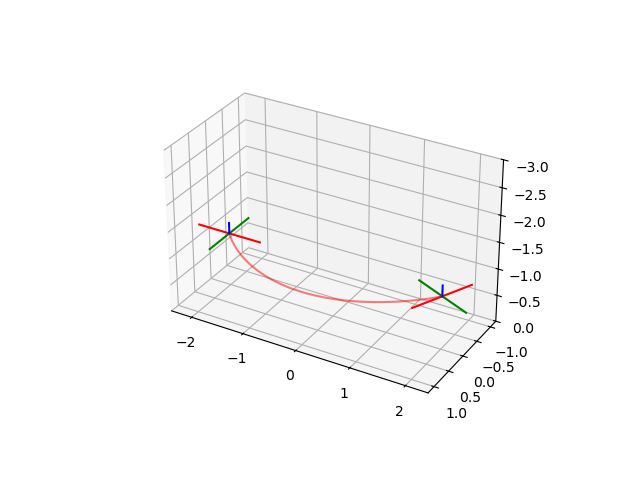

In [ ]:
tXUs = [ctl_mpc.tXUd, ctl_uqp.tXUd]
p3d.tXU_to_3D(tXUs)


In [ ]:
Ntest = 10

np.random.seed(0)
tXUs = [ctl_uqp.tXUd[:,1:]]

t0 = time.time()
for _ in range(Ntest):
    # Sample a random point in the state space
    idx = np.random.randint(0, ctl_uqp.tXUd.shape[1])

    tcr = ctl_uqp.tXUd[0,idx]
    xcr = ctl_uqp.tXUd[1:11,idx]
    upr = ctl_uqp.tXUd[11:15,idx-1]

    # # Perturb the sample point
    # xcr = xcr + np.random.normal(mu_md, std_md)
    # xcr[6:10] = xcr[6:10]/np.linalg.norm(xcr[6:10])

    # Generate the control
    ucc,_,tsol = ctl_uqp.control(tcr,xcr,upr)

    # # Append the control to the list
    # tXUs.append(tXU)
t1 = time.time()

hz = Ntest/(t1-t0)
print(f"Hz: {hz:.2f}")
# p3d.tXU_to_3D(tXUs)

Hz: 5.97
